# Satellite Imagery Analysis

Satellite images are images of the Earth that are collected by the imaging satellites which are operated by the government and businesses all around the world. In this workshop, we are going to explore some data science behind Satellite Imagery Analysis with Python.

**Dataset**
- Satellite images of the Sundarbans forest in India.
- The Sundarbans are one of the largest mangrove areas in the delta formed by the confluence of the Ganges, Brahmaputra and Meghna rivers in the Bay of Bengal. The Sundarbans Forest stretches approximately 10,000 km sq across India and Bangladesh, 40% of which is found in India and is home to many rare and globally threatened wildlife.
- We will be using a very small part of the Sundarbans region for the task of analysing satellite imagery with Python. 
- The Sundarbans satellite data are acquired using the [Sentinel-2 satellite](https://dataspace.copernicus.eu/explore-data/data-collections/sentinel-data/sentinel-2).- We will beam usinthe data in n the form of 954×298 pixels, with 12 bands with a spectral resolution varying from 10 to 60 meter

**Libraries**
- **EarthPy**  : This library is commonly used for working with spatial data in Python, especially satellite imagery.
- **Rasterio** : Designed for working with raster data, making it a good choice for geospatial TIFF files.



In [38]:
from IPython.display import HTML

# The "code" is taken from Goolge Maps (Find a location--> Share--> Embed A Map--> Copy Link)
HTML('''
<iframe src="https://www.google.com/maps/embed?pb=!1m16!1m12!1m3!1d473444.9983858136!2d88.95734441728473!3d22.0193923697073!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!2m1!1sSundarbans%20forest%20!5e0!3m2!1sen!2sau!4v1726727101306!5m2!1sen!2sau" width="600" height="450" style="border:0;" allowfullscreen="" loading="lazy" referrerpolicy="no-referrer-when-downgrade"></iframe>
''')

## Install necessary libraries

In [5]:
#!pip install earthpy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 54.5 MB/s eta 0:00:00 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 49.9 MB/s eta 0:00:00 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 79.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.5 MB/s eta 0:00:00 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [92]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize

import plotly.graph_objects as go

In [90]:
# Open the TIFF file
file_path = 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff'
with rio.open(file_path) as src:
    # Get image dimensions
    width = src.width
    height = src.height
    
    # Get the number of bands
    bands = src.count
    
    # Get bit depth
    bit_depth = src.dtypes[0]
    
    # Get CRS (Coordinate Reference System) if available
    crs = src.crs
    
    # Get image metadata
    metadata = src.meta
    
    # Print image information
    print(f"Dimensions: {height} x {width}")
    print(f"Number of Bands: {bands}")
    print(f"Bit Depth: {bit_depth}")
    #print(f"CRS: {crs}")
    #print(f"Metadata: {metadata}")

Dimensions: 954 x 298
Number of Bands: 2
Bit Depth: uint16


## Read in satellite data files

In [10]:
np.seterr(divide='ignore', invalid='ignore')
S_sentinel_bands = glob("data/*B?*.tiff")
S_sentinel_bands.sort()

In [12]:
S_sentinel_bands

['data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B8A_(Raw).tiff']

## Sentinel-2 satellite

Sentinel-2 is a multi-spectral imaging mission from the European Space Agency (ESA) that provides high-resolution optical imagery for land monitoring. Sentinel-2 satellites (A and B) carry the Multi-Spectral Instrument (MSI), which captures data in 13 spectral bands. Each band has a specific wavelength range that targets various land, water, and atmospheric features.

Sentinel-2 Spectral Bands and Wavelengths
Here's a list of the 13 bands from Sentinel-2, including their respective wavelengths:

- Band 1 (Coastal aerosol):
    - Wavelength: 443 nm (0.433 - 0.453 µm). Resolution: 60 m
    - Purpose: Coastal and aerosol studies.
- Band 2 (Blue):
    - Wavelength: 490 nm (0.458 - 0.523 µm). Resolution: 10 m
    - Purpose: Visible blue band, useful for water body analysis and coastal monitoring.
- Band 3 (Green):
    - Wavelength: 560 nm (0.543 - 0.578 µm). Resolution: 10 m
    - Purpose: Green band, useful for vegetation monitoring and chlorophyll assessment.
- Band 4 (Red):
    - Wavelength: 665 nm (0.650 - 0.680 µm). Resolution: 10 m.
    - Purpose: Red band, used for vegetation monitoring, detecting healthy vegetation.
- Band 5 (Red Edge 1):
    - Wavelength: 705 nm (0.698 - 0.713 µm). Resolution: 20 m.
    - Purpose: Red edge band, sensitive to vegetation chlorophyll content.
- Band 6 (Red Edge 2):
    - Wavelength: 740 nm (0.733 - 0.748 µm). Resolution: 20 m
    - Purpose: Red edge band, useful for vegetation monitoring.
- Band 7 (Red Edge 3):
    - Wavelength: 783 nm (0.773 - 0.793 µm). Resolution: 20 m
    - Purpose: Red edge band, used for detecting chlorophyll and plant stress.
- Band 8 (Near-Infrared - NIR):
    - Wavelength: 842 nm (0.785 - 0.899 µm). Resolution: 10 m
    - Purpose: High reflectance in vegetation, used for vegetation index calculations like NDVI.
- Band 8A (Red Edge 4):
    - Wavelength: 865 nm (0.855 - 0.875 µm). Resolution: 20 m
    - Purpose: NIR band, used for differentiating between different types of vegetation.
- Band 9 (Water Vapour):
    - Wavelength: 945 nm (0.935 - 0.955 µm). Resolution: 60 m
    - Purpose: Useful for atmospheric correction and water vapour detection.
- Band 10 (Shortwave Infrared - SWIR - Cirrus):
    - Wavelength: 1,375 nm (1.360 - 1.390 µm). Resolution: 60 m
    - Purpose: Detection of cirrus clouds.
- Band 11 (SWIR 1):
    - Wavelength: 1,610 nm (1.565 - 1.655 µm). Resolution: 20 m
    - Purpose: Detects moisture content in plants and soil, useful for vegetation monitoring and snow/ice detection.
- Band 12 (SWIR 2):
    - Wavelength: 2,190 nm (2.100 - 2.280 µm). Resolution: 20 m
    - Purpose: Provides information on soil and vegetation moisture content.

Key Points:
- High-Resolution Bands (10 m): Bands 2, 3, 4, and 8 are useful for detailed land and vegetation analysis.
- Red Edge Bands (Bands 5, 6, 7, 8A): These bands are critical for detecting subtle changes in vegetation health and chlorophyll content.
- SWIR Bands (Bands 11 and 12): Important for soil and vegetation moisture content and detecting cloud, snow, and ice.

These bands provide comprehensive data that can be used in applications like agriculture, forestry, land use, water quality monitoring, and environmental management.

## Visualise Bands

The dataset contains 12 bands with a spectral resolution varying from 10 to 60 meters. 

- `arr_st`: The array where we will save all the images containing different spectral bands.
- Each band represents different wavelengths (e.g., red, green, blue, NIR (near infrared), etc.).

### Example: Why use different bands?
Let me try to explain why we need to consider different bands using NIR band example.

The Near-Infrared region typically covers wavelengths from about 700 nm (nanometers) to 1400 nm, just beyond the visible light range that the human eye can detect.

Position in the Spectrum:
- NIR is situated just beyond the red end of the visible light spectrum, which ranges from approximately 400 nm (violet) to 700 nm (red).
- It is part of the broader infrared spectrum, which also includes mid-infrared and far-infrared regions.

Common Uses:
- Remote Sensing: NIR is widely used in satellite imagery and aerial photography because it provides valuable information about vegetation, water bodies, soil, and other land features that are not visible in standard RGB (red, green, blue) imagery.
- Vegetation Analysis: Healthy vegetation reflects a large amount of NIR light and absorbs visible light for photosynthesis. By analysing the NIR reflectance, one can assess plant health, density, and stress levels.
- Agriculture: NIR imagery helps in crop monitoring, estimating biomass, and detecting disease or drought stress.
- Environmental Monitoring: It is used to study land use changes, monitor deforestation, and assess environmental conditions.
- Medical Imaging: NIR is also used in medical imaging and diagnostics because it penetrates tissues more deeply than visible light, providing insights without invasive procedures.

Benefits of NIR in Remote Sensing:
- Detection of Water Content: NIR is sensitive to water content in plants and soils, which makes it useful for identifying moist or dry areas.
- Discrimination of Vegetation Types: Different types of vegetation reflect NIR light differently, making it easier to classify and map various plant species or ecosystems.
- Soil and Mineral Analysis: NIR can be used to detect soil composition and mineral content, which is useful in agriculture, geology, and environmental studies.

Indices Using NIR:
- NDVI (Normalized Difference Vegetation Index): NDVI uses the NIR and red bands to measure vegetation health. High NDVI values indicate healthy, dense vegetation, while low values suggest sparse or stressed vegetation.
- EVI (Enhanced Vegetation Index): EVI improves on NDVI by reducing the effects of atmospheric conditions and canopy background noise.

Let's visualize them to see what we are going to work with:

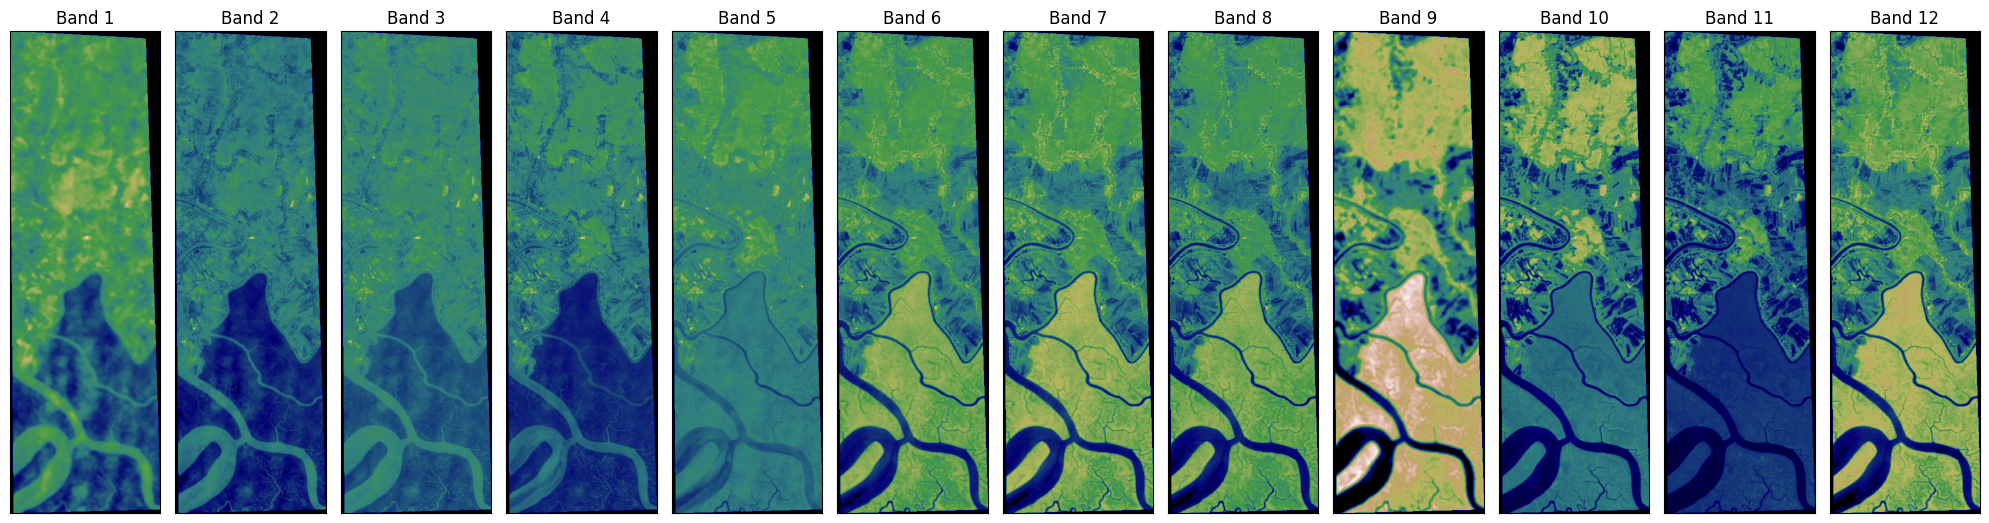

In [47]:
l = []
for i in S_sentinel_bands:
    with rio.open(i, 'r') as f:
        l.append(f.read(1))
arr_st = np.stack(l)
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 12, cbar = False)
plt.show()

This dataset has several numbers of bands that contain data ranging from visible to infrared. It is therefore difficult to visualize the data for humans. Creating an **RGB composite image** facilitates an effective understanding of the data.
- The function `ep.plot_rgb` is from the `earthpy.plot` module, which is part of the **EarthPy** library.
- The `plot_rgb` function specifically helps to visualize multi-band imagery data, such as RGB composites from satellite images, by plotting them as RGB images.

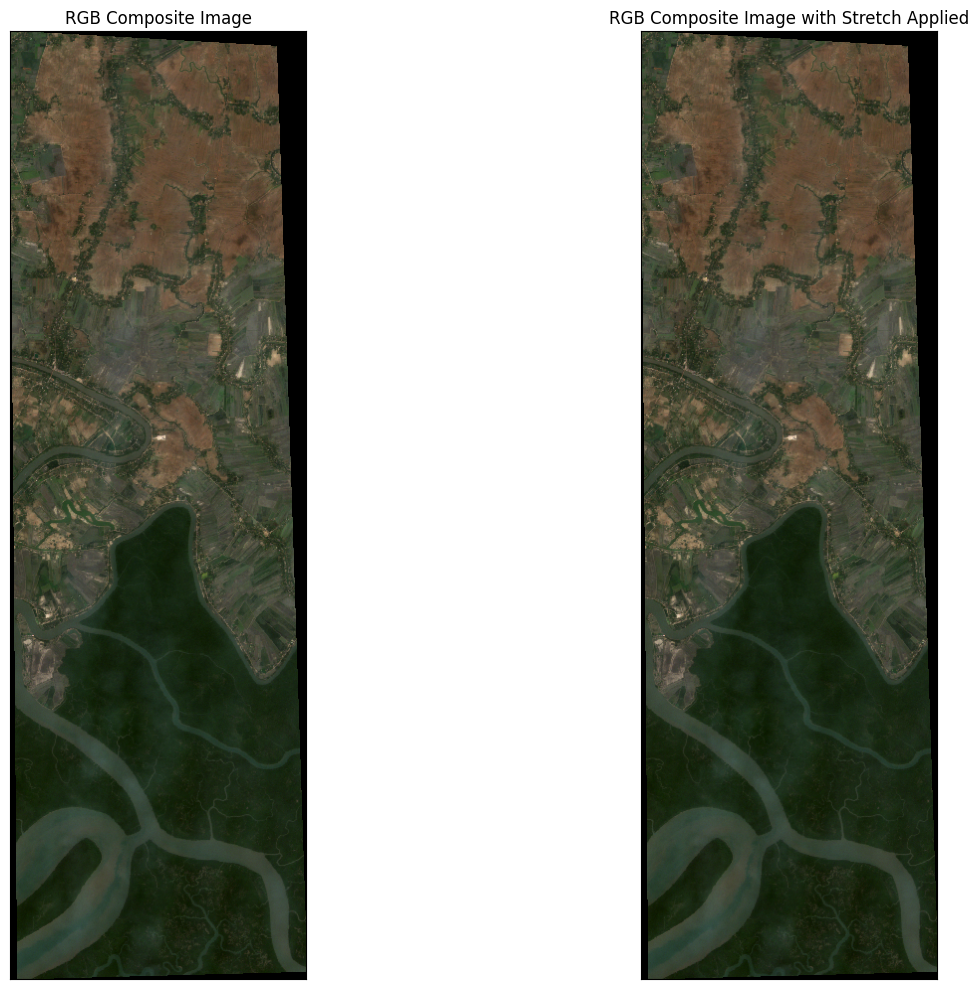

In [79]:
# Create a figure with two subplots side by side (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

# Plot the first RGB image on the left
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    ax=ax1
)
ax1.set_title('RGB Composite Image')

# Plot the second RGB image on the right
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),  # Uses bands 4, 3, and 2 for Red, Green, and Blue;   RECALL: Python counts from 0!!!
    stretch=True,   # Enables contrast stretching
    str_clip=0.2,   # Clips the 20% of extreme pixel values
    ax=ax2
)
ax2.set_title('RGB Composite Image with Stretch Applied')

# Display the plots
plt.tight_layout()
plt.show()

Now let's visualize the histogram of the dataset which will help us to understand the distribution of the values of the bands:

- We will create a series of histograms, each representing the distribution of pixel values for one of the bands in `arr_st`, with a total of 12 histograms.
- This visualization helps to understand how pixel values are distributed across different bands, such as identifying whether the values are concentrated in a specific range, the presence of outliers, or the differences between bands.

This type of plot is particularly useful in remote sensing and image analysis, where understanding the distribution of pixel values can help in tasks like classification, segmentation, and identifying spectral characteristics of different land covers.

- **What Is Plotted on the Y-Axis?** The y-axis shows the frequency or count of pixels that fall into each bin of pixel values. 
- **What Is Plotted on the X-Axis?** These values represent the intensity or reflectance of light recorded by each spectral band in the image.
    - For example, in an 8-bit image, these values typically range from 0 to 255, where 0 indicates no reflectance (black) and 255 indicates maximum reflectance (white or full intensity).
    - For our TIFF image files, the bit depth is 16 (16-bit image), so the range is between 0 (no intensity) and 65,535 (maximum intensity). 
 
Interpretation:
- If a histogram shows a peak around a certain value on the x-axis, it means that many pixels have intensity values near that peak.
- A flat histogram would indicate a uniform distribution of pixel values.
- A histogram skewed towards the left or right indicates that most of the pixel values are lower or higher, respectively.

Why This Is Important:
Understanding the distribution of pixel values across different bands can reveal crucial information about the image data:
- High peaks at specific values suggest that the image has many similar pixel values, which might indicate specific land cover types or features.
- Wide distributions indicate a greater variety of values, which can mean more complex or heterogeneous scenes.
- Outliers or unusual spikes could suggest noise or errors in the data.

This analysis is particularly useful in remote sensing, where each band captures different characteristics of the earth's surface, helping in classification, feature extraction, and analysis of spectral properties.

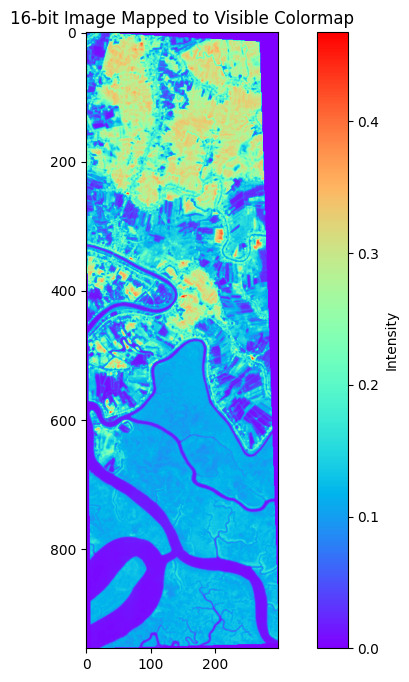

In [107]:
# Open the 16-bit TIFF file using rasterio
file_path = 'data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff'
with rio.open(file_path) as src:
    # Read the first band of the image
    band = src.read(1)

# Normalize the 16-bit band data to 0-1 range
norm = Normalize(vmin=0, vmax=65535)
normalized_band = norm(band)

# Apply a colormap (e.g., 'viridis') to the normalized data
plt.figure(figsize=(10, 8))
plt.imshow(normalized_band, cmap='rainbow')
plt.colorbar(label='Intensity')
plt.title('16-bit Image Mapped to Visible Colormap')
plt.show()

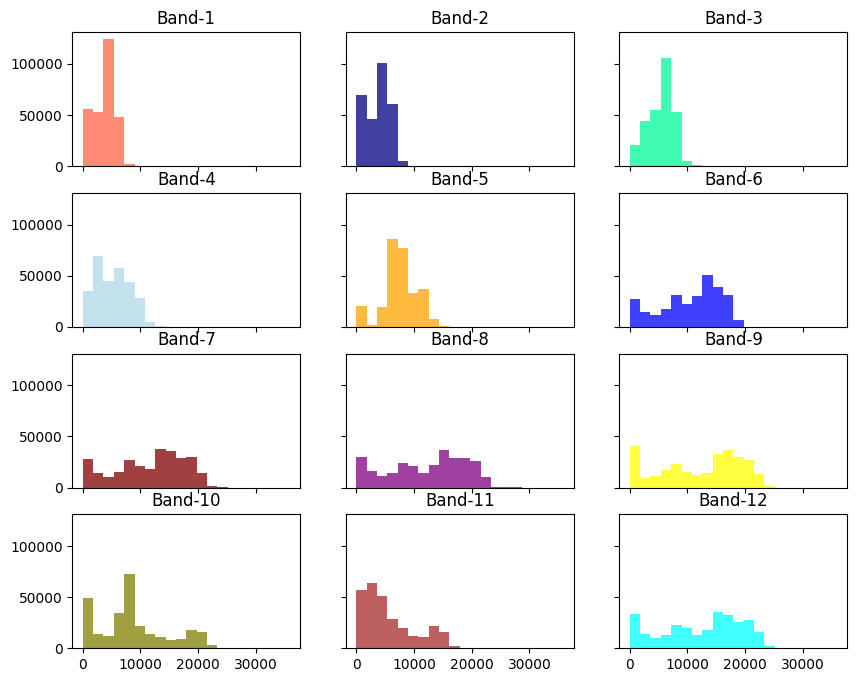

In [111]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']
ep.hist(arr_st, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.75, 
        figsize = (10, 8)
        )

plt.show()

# Vegetation Indices

**
Normalized Difference Vegetation Index (NDVI**: 

To determine the density of green on a patch of land, researchers must observe the distinct colors (wavelengths) of visible(VIS) and near-infrared (N IR)sunlight reflected by the plants. The Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared which vegetation strongly reflects and red light (which vegetation absorbs+
The NDVI is calculated using the near-infrared (NIR) and red (visible) bands of an image. Vegetation strongly reflects NIR light and absorbs red light due to chlorophyll in the leaves.

The formula for NDVI is:
$$ NDVI = \frac{NIR−Red}{NIR+Red} $$

NDVI values range from -1 to +1:

- Negative Values: Represent non-vegetated surfaces (e.g., water, snow, clouds).
- Values Close to Zero: Indicate little to no vegetation  (e.g., urban areas, bare soil).
- Positive Values Close to +1: Represent healthy, dense green vegetation (e.g., dense vegetation, forests, agricultural fields).

**Why Bands 8 and 4 Are Chosen**
- Band 8 (NIR - Near-Infrared): This band typically corresponds to near-infrared wavelengths, which vegetation strongly reflects. This high reflectance is because healthy vegetation has a cellular structure that scatters NIR light.
- Band 4 (Red - Visible Light): This band typically corresponds to the red wavelengths of visible light, which vegetation absorbs due to chlorophyll for photosynthesis.

**Purpose of Selecting Bands 7 and 3**
- Band 8 (NIR) captures light that is strongly reflected by healthy, green vegetation but not by other surfaces.
- Band 4 (Red) captures light that is absorbed by vegetation, particularly due to chlorophyll.
- By calculating the difference between these two bands, NDVI leverages the contrasting reflection and absorption properties of vegetation, providing a quantitative measure of vegetation health.

 Now we will analyze the vegetation of the Sundarbans region.

- When you have negative values it is probably water.
- On the other hand, if you have an NDVI value close to +1, it may be dense green leaves.
- But when the NDVI is close to zero, there are no green leaves and it might even be an urbanized area.

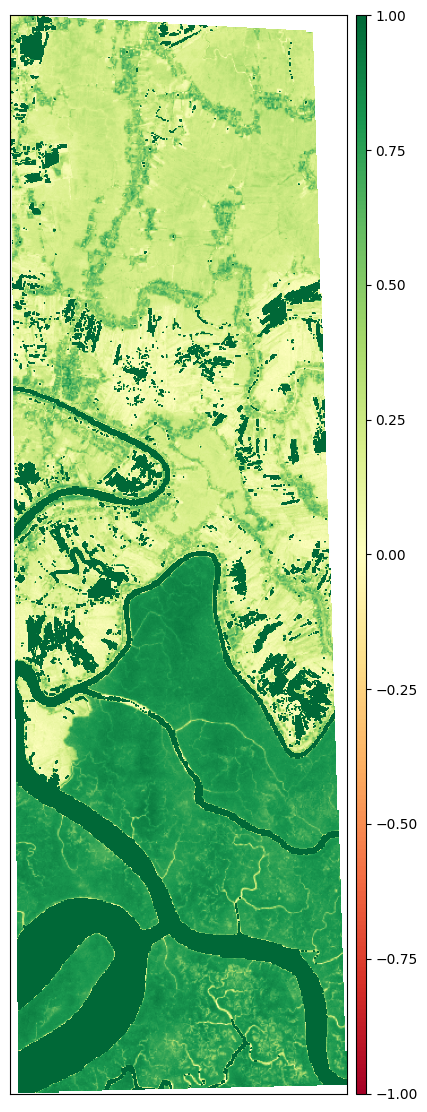

In [22]:
ndvi = es.normalized_diff(arr_st[7], arr_st[3]) # Recall Python counts from 0.
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

## Soil Adjusted Vegetation Index (SAVI)

The Soil-Adjusted Vegetation Index (SAVI) is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low.

SAVI was developed to address the limitations of NDVI in areas with sparse vegetation where the presence of bare soil can skew vegetation measurements. NDVI can be heavily influenced by the reflectance properties of the underlying soil, making it less reliable in these conditions.

By incorporating a soil-brightness correction factor, SAVI reduces the soil's impact on the vegetation index, providing a more accurate measure of vegetation cover and health.

The SAVI formula is similar to NDVI but includes a correction factor (L) to adjust for soil brightness:

$$ SAVI = \frac{\left(NIR−Red\right)\times\left(1+L\right)}{NIR+Red+L} $$
​
where $L$ = Soil adjustment factor, typically ranging between 0 and 1.
Adjustment Factor (L) determines the level of soil brightness correction:
- $L = 0$: No adjustment, equivalent to NDVI.
- $L = 1$: Maximum adjustment for soil brightness.
- Commonly used value: $L = 0.5$, which provides a balance suitable for most conditions with moderate vegetation cover and varying soil brightness.

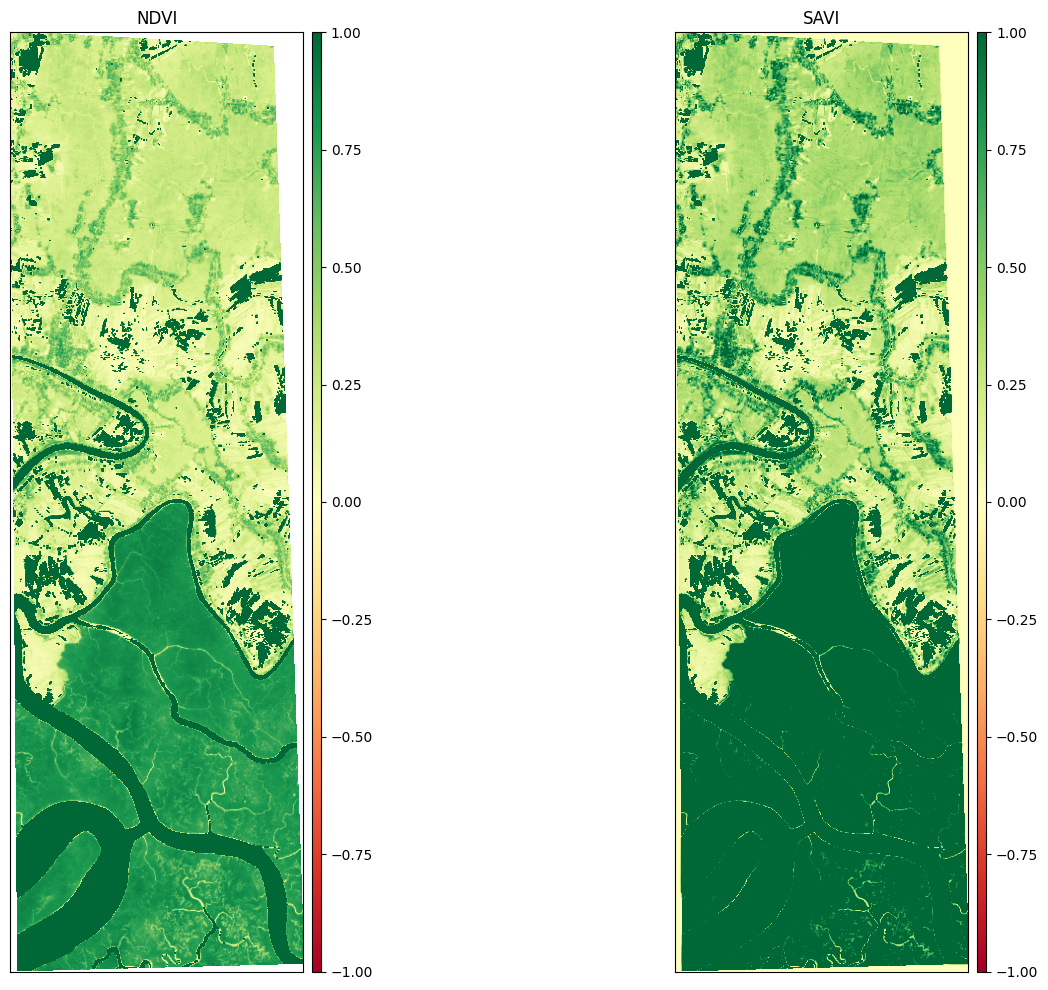

In [136]:
L = 0.5
savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)

# Create a figure with two subplots side by side (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

# Plot NDVI on the left
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14), ax=ax1)
ax1.set_title('NDVI')

# Plot SAVI image on the right
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14), ax=ax2)
ax2.set_title('SAVI')

# Display the plots
plt.tight_layout(); plt.show()

## Visible Atmospherically Resistant Index (VARI)

The Visible Atmospherically Resistant Index (VARI) is designed to emphasize vegetation in the visible portion of the spectrum while mitigating illumination differences and atmospheric effects. It is ideal for RGB or color images; it utilizes all three color bands.

VARI is particularly useful because, unlike other vegetation indices like NDVI or SAVI, it **does not require near-infrared (NIR) data**, making it accessible for visible-light sensors, such as common cameras or low-cost remote sensing devices.

VARI is calculated using the green, red, and blue bands of an image:

$$ VARI = \frac{Green−Red}{Green+Red-Blue} $$
​
- Green: Reflectance in the green wavelength (e.g., Band 3 in Sentinel-2).
- Red: Reflectance in the red wavelength (e.g., Band 4 in Sentinel-2).
- Blue: Reflectance in the blue wavelength (e.g., Band 2 in Sentinel-2).

How VARI Works:
- Green Band Sensitivity: Vegetation reflects green light strongly, so the green band plays a crucial role in identifying vegetation.
- Reduction of Atmospheric Noise: VARI's formulation helps reduce the effects of atmospheric conditions like haze, which typically impact the blue and red bands. By including these bands in the denominator, VARI counteracts some of these influences, making it "atmospherically resistant."
- No Need for NIR: Unlike NDVI or SAVI, which rely on NIR, VARI uses only visible bands, making it accessible for use with a broader range of sensors, including standard cameras.

Interpretation of VARI Values:
- Positive VARI Values: Indicate the presence of green vegetation. Higher values suggest denser, healthier vegetation.
- Values Close to Zero or Negative: Suggest low vegetation presence, such as bare soil, urban areas, or water.

Applications:
- Agriculture: Used for crop monitoring, estimating vegetation health, and detecting early signs of stress in agricultural fields, especially when using drone or RGB imagery.
- Urban Green Space Monitoring: Effective for assessing vegetation in urban environments where NIR data is often not available.
- Forestry and Environmental Monitoring: Useful for assessing greenness in forests and other vegetation-rich areas, particularly in settings where atmospheric effects might distort other indices.

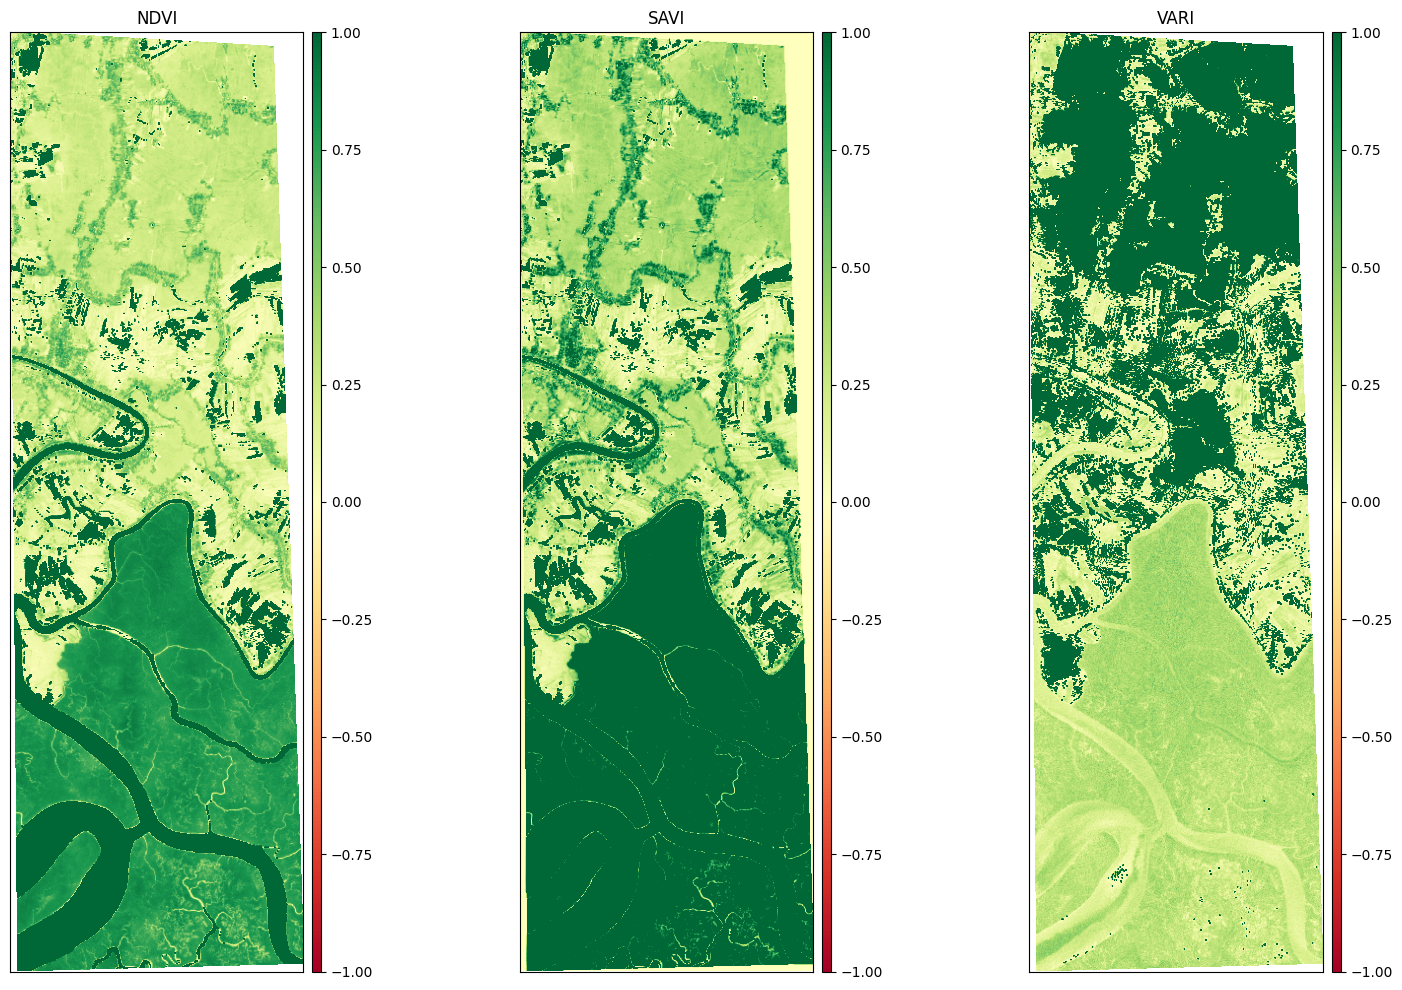

In [142]:
vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 10))

# Plot NDVI on the left
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14), ax=ax1)
ax1.set_title('NDVI')

# Plot SAVI image on the right
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14), ax=ax2)
ax2.set_title('SAVI')

# Plot VARI image on the right
ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14), ax=ax3)
ax3.set_title('VARI')

# Display the plots
plt.tight_layout(); plt.show()

# Water Indices

Surface water change is a very important indicator of environmental, climatic, and anthropogenic activities. Remote sensors, such as sentinel-2, Landsat, have been providing data for the last four decades, which are useful for extracting land cover types such as forest and water. Researchers have proposed many surface water extraction techniques, among which index-based methods are popular owing to their simplicity and cost-effectiveness.

## Modified Normalized Difference Water Index (MNDWI)

The Modified Normalized Difference Water Index (MNDWI) uses green and SWIR bands for the enhancement of open water features. It also diminishes built-up area features that are often correlated with open water in other indices.

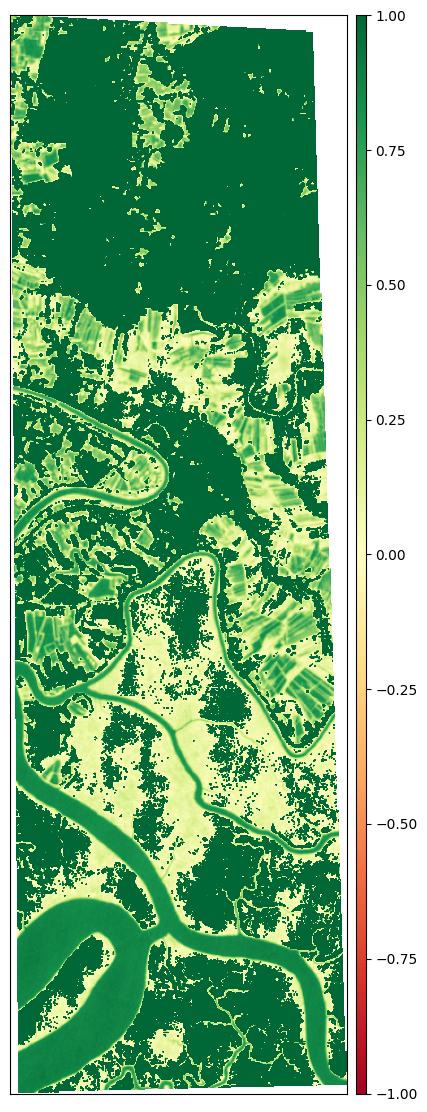

In [144]:
mndwi = es.normalized_diff(arr_st[2], arr_st[10])
ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

## Normalized Difference Moisture Index (NDMI)

The Normalized Difference Moisture Index (NDMI) is sensitive to the moisture levels in vegetation. It is used to monitor droughts as well as monitor fuel levels in fire-prone areas. It uses NIR and SWIR bands to create a ratio designed to mitigate illumination and atmospheric effects.


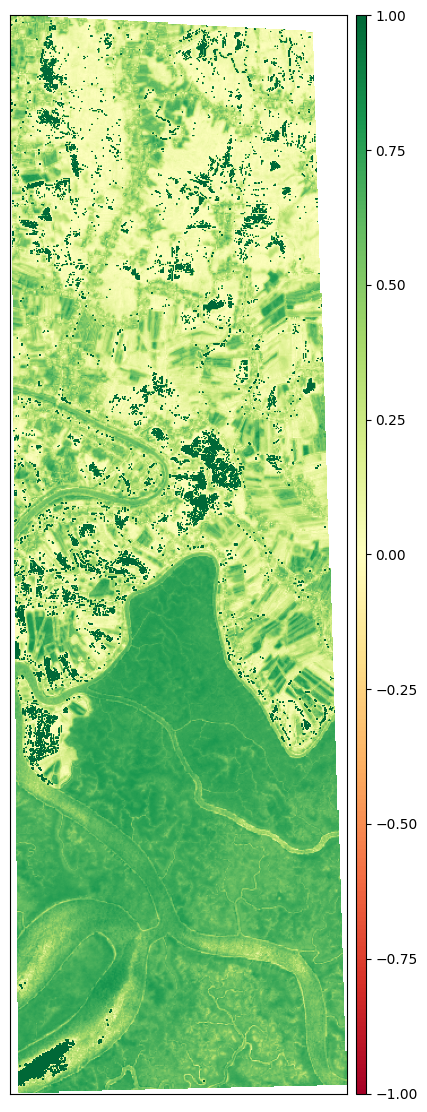

In [146]:
ndmi = es.normalized_diff(arr_st[7], arr_st[10])
ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

# Geology Indices

Satellite imagery and aerial photography have proven to be important tools in support of mineral exploration projects. They can be used in a variety of ways. Firstly they provide geologists and field crews the location of tracks, roads, fences, and inhabited areas.

## Clay Minerals

The clay ratio is a ratio of the SWIR1 and SWIR2 bands. This ratio leverages the fact that hydrous minerals such as clays, alunite absorb radiation in the 2.0–2.3 micron portion of the spectrum. This index mitigates illumination changes due to terrain since it is a ratio.io.


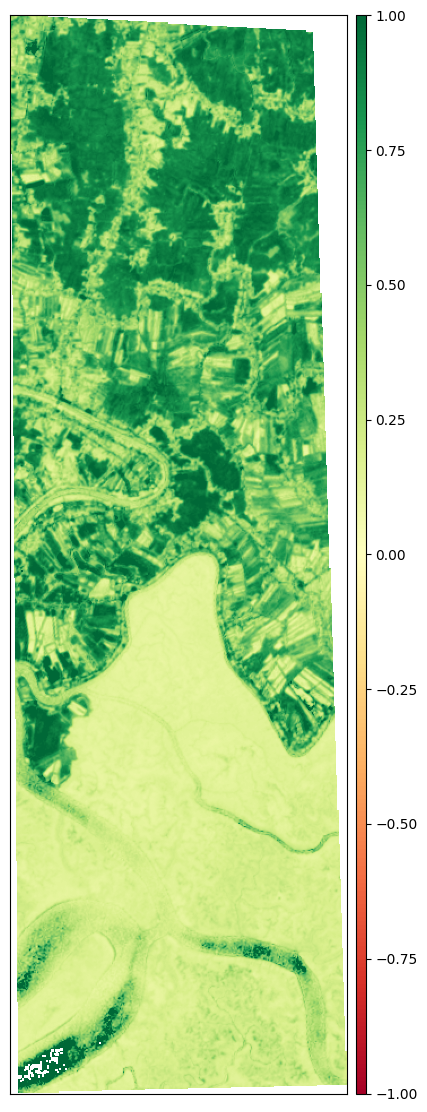

In [154]:
cmr = np.divide(arr_st[10], arr_st[11])
ep.plot_bands(cmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

## Ferrous Mineral

The ferrous minerals ratio highlights iron-bearing materials. It uses the ratio between the SWIR band and the NIR ban.


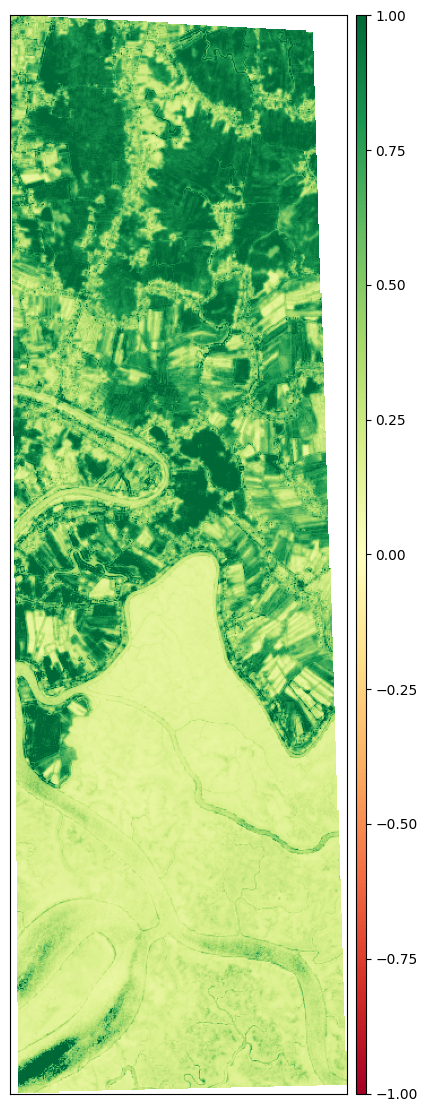

In [156]:
fmr = np.divide(arr_st[10], arr_st[7])
ep.plot_bands(fmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()